# Get them adopted

![Austin-shelter](http://www.austintexas.gov/sites/default/files/aac_logo.jpg)

## Business question:

Austin, Texas is the largest No Kill community in the nation, and home to the Austin Animal Center. They provide shelter to more than 16,000 animals each year and animal protection and pet resource services to all of Austin and Travis County. Annually over 90% of animals entering the center, are adopted, transferred to rescue or returned to their owners.

The Austin Animal Center _also_ has the longest running public dataset of animal rescues in the country. Every animal has a unique id that ties to both their [intake](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and [outcome](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238) data when they enter and leave the shelter. Given their data, my questions of interest were:

- What animals need a PR campaign?
- What resources does the Animal Center need?

Analyzing the Austin Animal Center data to answer these questions will assist their mission an improve operations. 

### Defining "Needing PR campaign" as animals that take the longest time to get adopted, or have the fewest transfers to rescue partners.
![img](./images/animals.png)


### For resources, I chose to focus on factors that would impact **cost** and _staffing_:
- breed/specialization of staff
- funds for neutering animals
- average stay of animals - would impact resources needed (food, cleaning, space)
- condition of animals when they enter the shelter
- percent of "special needs" animals - babies/seniors

![img2](./images/pet-resource-center-og.jpg)

### Import packages and process data

`data_cleaning` and `feature_engineering` are packages made to store the functions and code used to prepare the data in seperate namespaces. 

In [263]:
import pandas as pd
import numpy as np
import cleaning_code.data_cleaning as dc
import cleaning_code.feature_engineering as fe

pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')
intakes = pd.read_csv('https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD')

#### `data_cleaning`
For each intake and outcome file, respectively addresses:
- dates not in the correct datetime format
- column names have mixed cases and spaces 
- an age variable that needs to be replaced
- unnecessary columns tht can be dropped
- create some additional date variables to help merge later

Before merging the datasets to create a record for each animal's stay each year. Length of stay can then be created by comparing the intake and outcome dates.

In [265]:
outcomes = dc.prep_outcomes_file(outcomes)
intakes = dc.prep_intakes_file(intakes)
animal_shelter_df = dc.merge_files(intakes,outcomes)

#### `feature_engineering`

In [ ]:
animal_shelter_df = fe.create_species_var(animal_shelter_df)
animal_shelter_df = fe.create_neutered_var(animal_shelter_df)
animal_shelter_df = fe.reduce_breed_list(animal_shelter_df)

##### `create_species_var`

Exploritory analysis revealed that the two variables that describe the "type" of animal were `animal_type` and `breed`.

While Cat and Dog were straight forward, "Other" appeared to hold a mix of species - both pets and wildlife. The snippet below also shows there is a lot of fuzzy matching within the breed variable. "Rabbit" and "Guinea Pig" each had repeat entries. I created `create_species_var` to map and aggregate the breed and intake_type to provide more insight into the types of animals the shelter services.

In [268]:
animal_shelter_df.animal_type.value_counts()

Dog          63103
Cat          36245
Other         3148
Bird           394
Livestock       12
Name: animal_type, dtype: int64

In [269]:
animal_shelter_df[animal_shelter_df.animal_type == "Other"].breed.value_counts()[:10]

Bat Mix           885
Bat               643
Rabbit Sh Mix     259
Guinea Pig        176
Raccoon Mix       137
Guinea Pig Mix    129
Raccoon           126
Rat Mix            58
Rabbit Sh          52
Skunk Mix          42
Name: breed, dtype: int64

In [270]:
animal_shelter_df.species.value_counts()

Dog           63103
Cat           36245
Wildlife       2009
Rabbit          552
Guinea Pig      305
Chicken         220
Rodent          159
Parrot           89
Repitle          62
Ferret           50
Duck             31
Aquatic          30
Other            13
Livestock        12
Song Bird        11
Game Bird         8
Hedgehog          3
Name: species, dtype: int64

##### `create_neutered_var` and `reduce_breed_list`

 Neutering of animals at the Austin Animal Center is funded by [The City of Austin and Travis County](https://www.austintexas.gov/page/no-kill-plan), but how many neuterings are they doing a month? Is that number increasing  or decreasing? By comparing the sex of the animal at intake versus the outcome, a change in status from "intact" to "neutered" reveals the animal was neutered during their stay at the Rescue Center.
 
The reduced_breed_list removed "mix" from many of the cat and dog breeds. This allowed "Domestic Shorthair Mix" cats to be counted along with "Domestic Shorthair" and the same with "German Shepard Mix" being count as a "German Shepard."

#### Revisit our questions

- Age of animals in shelter
- Average animal length of stay
- Medical staff needed

Going to exclude livestock - only 12 and they are pigs and goats sample story animal_id = 103883, 6153 - they get transfered or partner org

ducks: 72688, 51609

### Start summary tables and analysis (yes, visualizations are not great yet)
### really raw EDA

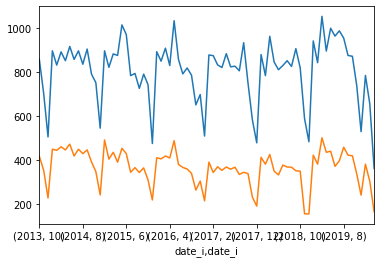

In [248]:
test.loc[(test['species']=="Dog")].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()
test.loc[(test['species']=="Dog") & (test['neutered']==1)].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()


In [217]:
test.neutered.value_counts()

0    57780
1    45073
Name: neutered, dtype: int64

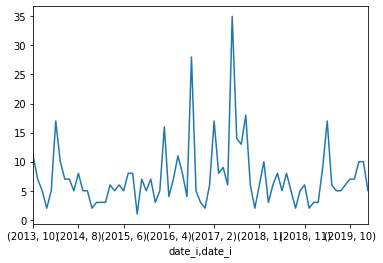

In [224]:
### Data Summary
test.loc[test['species']=="Rabbit"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()


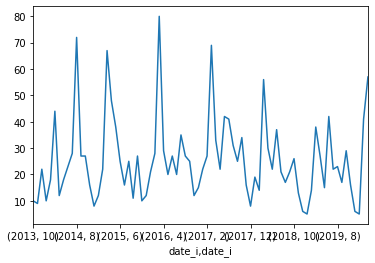

In [225]:
test.loc[test['species']=="Wildlife"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

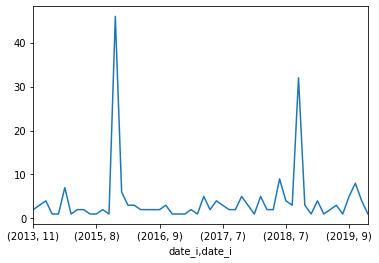

In [226]:
test.loc[test['species']=="Chicken"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

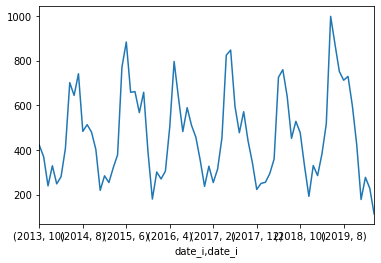

In [227]:
test.loc[test['species']=="Cat"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

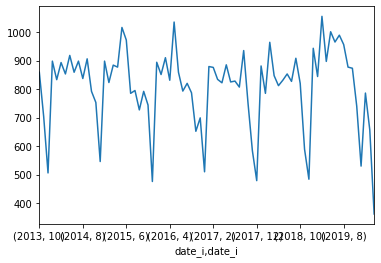

In [228]:
test.loc[test['species']=="Dog"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

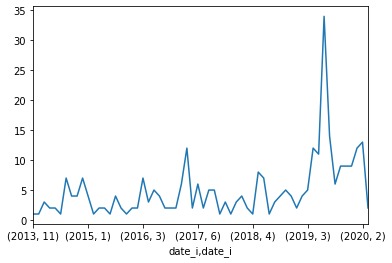

In [229]:
test.loc[test['species']=="Guinea Pig"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

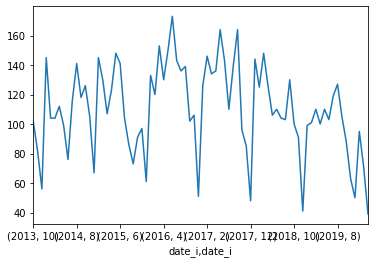

In [244]:
test.loc[test['breed']=="Pit Bull"].groupby([test.date_i.dt.year, test.date_i.dt.month])["animal_id"].count().plot()

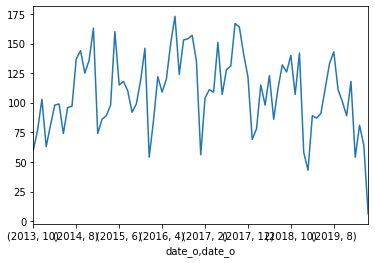

In [245]:
test.loc[test['breed']=="Pit Bull"].groupby([test.date_o.dt.year, test.date_o.dt.month])["animal_id"].count().plot()

## Medical needs

1. How many animals come in injured? And what happens to them?
2. How many animals come in and over their stay get neutered?
3. Any trends in the animals that do not get neutered?

### Final Questions:

#### names
- What are the most commonly adopted dog breed? what dog is the most common brought in?
- What dog breeds could use a marketing campaign to get them adopted more?
- What are the top 3 names of adopted dogs?
- Create a graph using matplotlib that shows the difference between intake and adoption for the top 10 breeds brought into the shelter

#### counts
- create a dataset of animals that are adopted, that shows aggregated by month how many intakes, adoptions and neuterings take place. Create a matplotlib graph of this data and make a business recommendation. (**extra bonus** if you can get the aggregate level to a weekly numbers)

### Findings:

- After dogs and cats, wildlife is the largest category of animals brought to the shelter
- Intake numbers for most species appears to be seasonal, _except_ for Chickens, Rabbits, and Guinea Pigs - hard to plan for

### Business Recommendations

### Limitations of the analysis

- Missing animals that came back to the shelter more than one time during a year
- Not examining animals still in the shelter
- Do not know specific costs of care or current staffing of Rescue Center


### Future Work

